<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In this project, the goal is to develop a regression model to accurately predict the insurance costs for individual customers based on their demographic and lifestyle attributes. The dataset includes critical factors such as age, BMI, number of children, smoking status, gender, and geographic region, which all contribute to the overall cost of insurance. By building this predictive model, the insurance company can assess risk more accurately, personalize premium pricing, and optimize its pricing strategy, ensuring both competitiveness in the market and profitability. The model will also help identify the key factors that significantly influence insurance costs, enabling targeted customer engagement and risk mitigation strategies.

<center><img src="https://www.canarahsbclife.com/content/dam/choice/blog-inner/images/what-is-insurance-meaning-and-benefits-of-insurance.jpg" width=500/></center>

**Content**  
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



**Dataset Description:**  
- `age`: Age of the customer (numerical value)

- `sex`: Sex of the customer (Male/Female)

- `bmi`: Bmi ratio of the customer (numberical value)

- `children`: Number of childern (numerical value)

- `smoker`: Is the customer smokes or not (Yes/No)

- `Region`: where did customer located (southeast, southwest, northeast, northwest)
- `expenses`: total medical expenses charged to the individual policyholder


# STEP 1: Import Necessary Libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

# STEP 2: Read Dataset from Google Drive

In [2]:
# Load the data

# Mount the drive
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
# Read the Excel file, skipping the first row and using the second row as the header
insurance_csv ='/content/drive/MyDrive/regression_data/insurance_dataset.csv'
insurance_clients_df = pd.read_csv(insurance_csv)


In [4]:
# View the data
insurance_clients_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
insurance_clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# STEP 3: EDA

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to uncover patterns, detect anomalies, test hypotheses, and check assumptions. It helps in understanding the underlying structure of the data before applying modeling techniques.

## 3.1 Check the distribution of `bmi` and list down your observtions


<Axes: xlabel='bmi', ylabel='Count'>

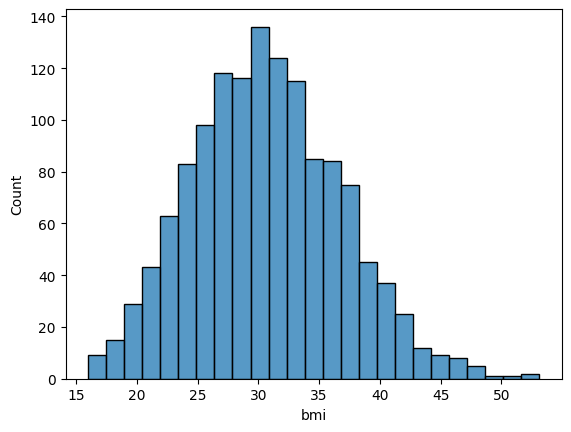

In [6]:
# Create a bmi histogram to see the disribution of bmi
bmi_list = insurance_clients_df['bmi']

# Use histplot from sns library
sns.histplot(data=bmi_list)
# insurance_clients_df
# bmi_list


## 3.2 Find the distribution of all the categorical variables and list down your observations.

*Hint: Use pie chart for this visualization*

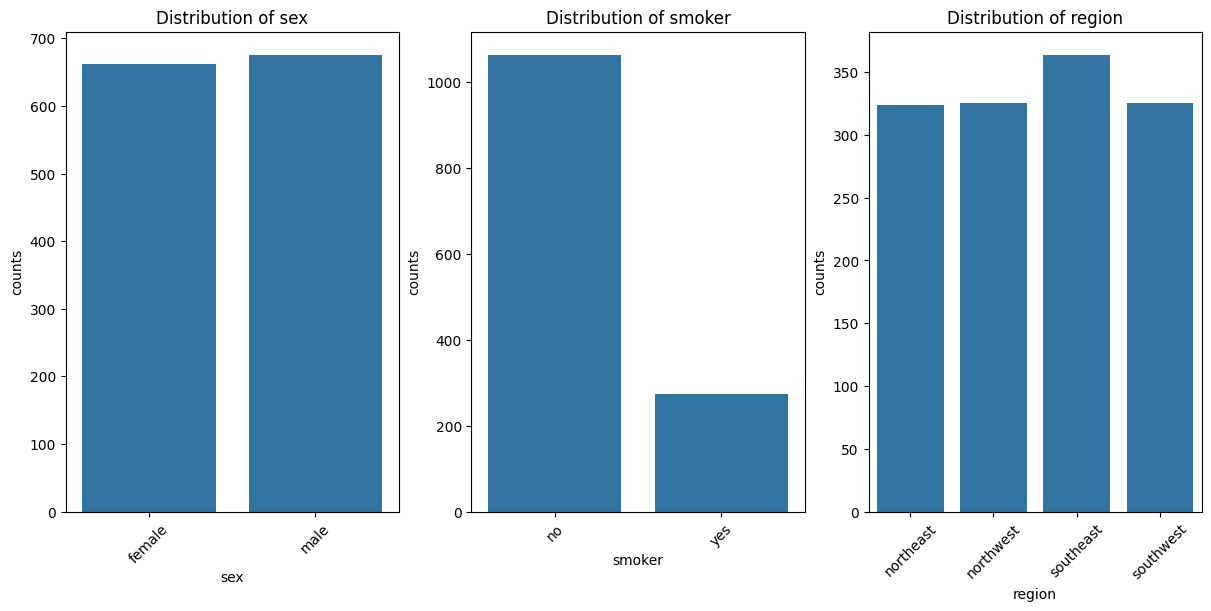

In [7]:
### Visualize the distribution of categorical variables

# Create a list of the categorical columns
categorical_columns = insurance_clients_df.select_dtypes('object').columns


# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), constrained_layout=True)


for i, col in enumerate(categorical_columns):
    category_counts = insurance_clients_df.groupby(col).size().reset_index(name='counts')


    # Create bar plot using seaborn with adjustments
    #plt.figure(figsize=(4, 4), axis=[row, col_index])  # Adjust figure size as needed - Removed the problematic line
    # The subplots are already created using plt.subplots, use axes[row, col_index] instead
    sns.barplot(ax=axes[i], x=col, y='counts', data=category_counts)
    axes[i].set_title(f'Distribution of {col}')

    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=45) # Rotate 45 degrees, align right

# fig.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust values as needed
# plt.show()



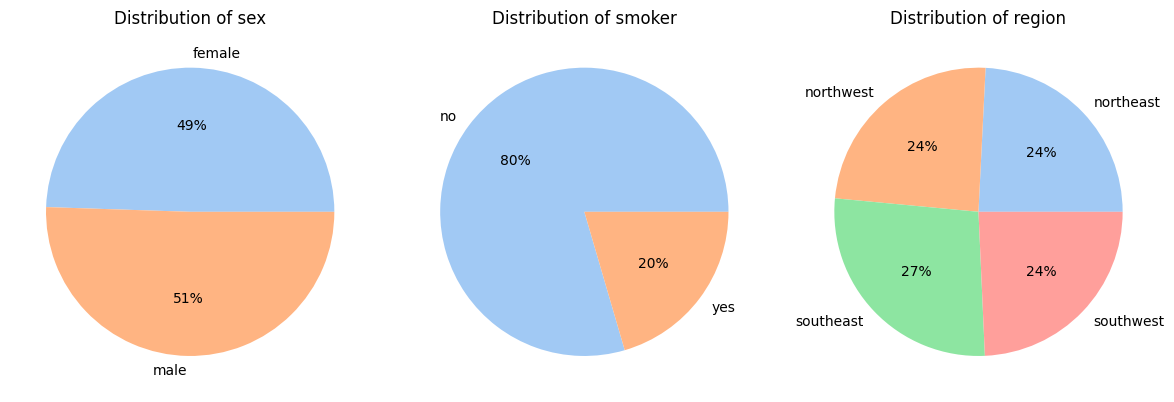

<Figure size 640x480 with 0 Axes>

In [8]:
### Generate pie charts for the categorical columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, (col, ax) in enumerate(zip(categorical_columns, axes.flatten())):

  category_counts = insurance_clients_df.groupby(col).size().reset_index(name='counts')

  # Define data and lables
  data = category_counts['counts']
  labels = category_counts[col]


  #define Seaborn color palette to use
  colors = sns.color_palette('pastel')[0:5]

  #create pie chart
  ax.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
  ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


## 3.3 Check the relationship between the variables `smoker`, `age`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

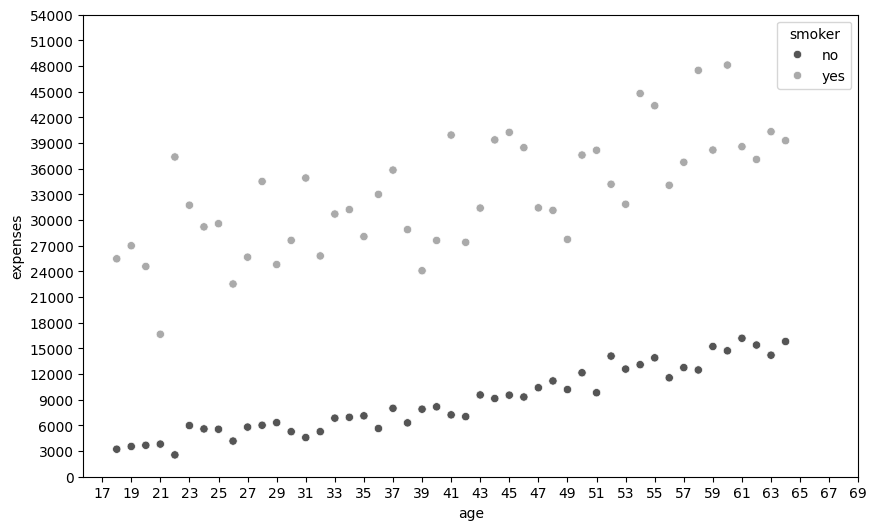

In [9]:
# Grouping data by 'smoker' and 'age' to calculate the mean expenses for each group
expenses_grouping = insurance_clients_df.groupby(['smoker', 'age']).agg({'expenses': 'mean'}).reset_index()


# Setting up the plot
plt.figure(figsize=(10, 6))


# Creating a scatter plot with 'age' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
sns.scatterplot(x = "age", y = "expenses", data = expenses_grouping, hue = "smoker", sizes = (100, 300), palette = "gist_gray")


# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(range(0, 55000, 3000))


# Customizing the x-axis ticks to range from age 17 to 70 with increments of 2 years
plt.xticks(range(17, 70, 2))


# Display the plot
plt.show()


## 3.3 Check the relationship between the variables `smoker`, `bmi`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

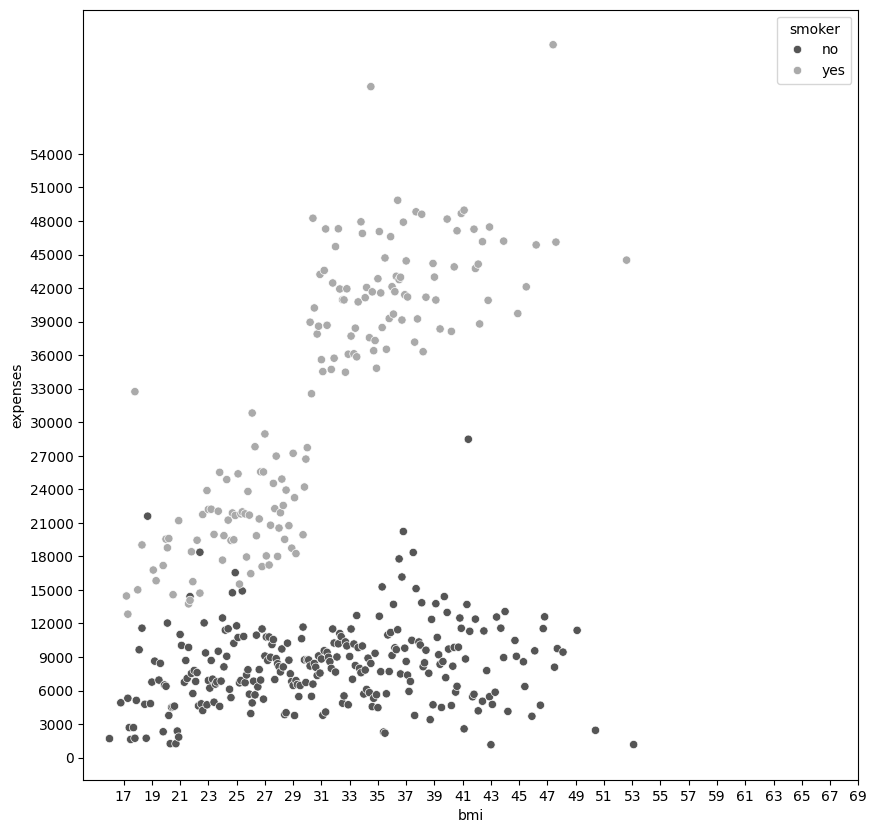

In [10]:
### Checking the relationship between smoker, BMI, and expenses

# Grouping the data by 'smoker' and 'bmi' to calculate the mean expenses for each group
bmi_expenses_grouping = insurance_clients_df.groupby(['smoker', 'bmi']).agg({'expenses': 'mean'}).reset_index()


# Setting up the plot
plt.figure(figsize=(10, 10))


# Creating a scatter plot with 'bmi' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
sns.scatterplot(x = "bmi", y = "expenses", data = bmi_expenses_grouping, hue = "smoker", sizes = (100, 300), palette = "gist_gray")


# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(range(0, 55000, 3000))


# Customizing the x-axis ticks to range from BMI 17 to 70 with increments of 2 units
plt.xticks(range(17, 70, 2))


# Display the plot
plt.show()


## 3.4 Find the outliers (if any) in the numerical variables

*Hint: Use box plot and calculate IQR to detect the outliers.*

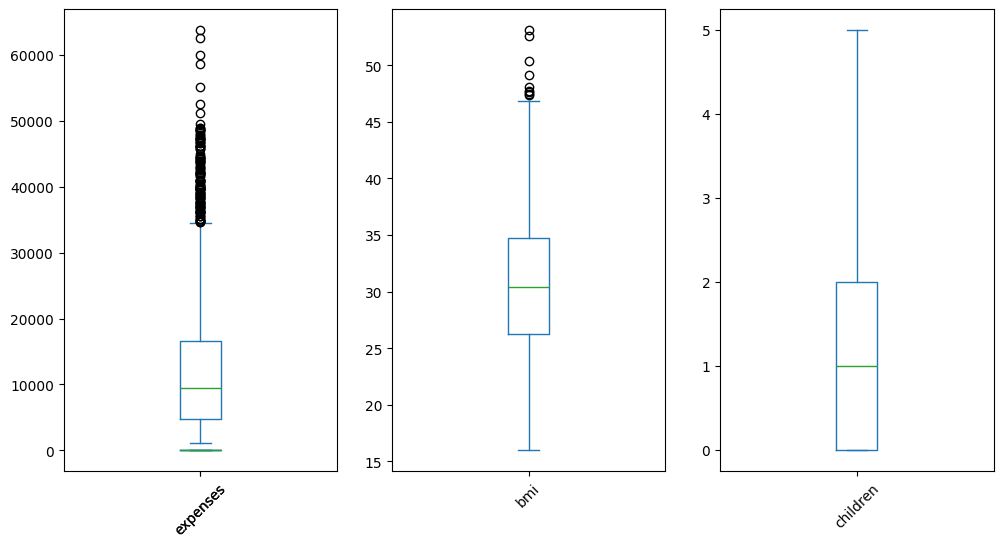

In [11]:
# Identify numerical columns for outlier detection
numerical_columns = insurance_clients_df.select_dtypes('number').columns


# Visualizing Outliers Using Box Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, col in enumerate(numerical_columns):

  insurance_clients_df[col].plot(kind='box', rot=45, ax=axes[i % 3])



In [12]:
# Identifying Outliers Using the IQR Method

# Initialize a dictionary to store outliers
outliers_dict = {}

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column

for col in numerical_columns:

# Compute the Interquartile Range (IQR)
  IQR = insurance_clients_df[col].quantile(0.75) - insurance_clients_df[col].quantile(0.25)

  # Define the lower and upper bounds to detect outliers
  lower_outlier_boundary = insurance_clients_df[col].quantile(0.25) - 1.5 * IQR
  upper_outlier_boundary = insurance_clients_df[col].quantile(0.75) + 1.5 * IQR

  # Identify outliers that fall outside the lower and upper bounds
  outliers = insurance_clients_df[(insurance_clients_df[col].values > upper_outlier_boundary) | (insurance_clients_df[col].values < lower_outlier_boundary)][col]
  # outliers = insurance_clients_df[(insurance_clients_df[col] < lower_outlier_boundary) | (insurance_clients_df[col] > upper_outlier_boundary)][col]


  # Store the detected outliers in the dictionary
  outliers_dict[col] = outliers  # To store the values of outliers

# Print the detected outliers for each numerical feature
  print(f"\nOutliers in {col}:")
  print(outliers_dict[col])




Outliers in age:
Series([], Name: age, dtype: int64)

Outliers in bmi:
116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

Outliers in children:
Series([], Name: children, dtype: int64)

Outliers in expenses:
14      39611.76
19      36837.47
23      37701.88
29      38711.00
30      35585.58
          ...   
1300    62592.87
1301    46718.16
1303    37829.72
1313    36397.58
1323    43896.38
Name: expenses, Length: 139, dtype: float64


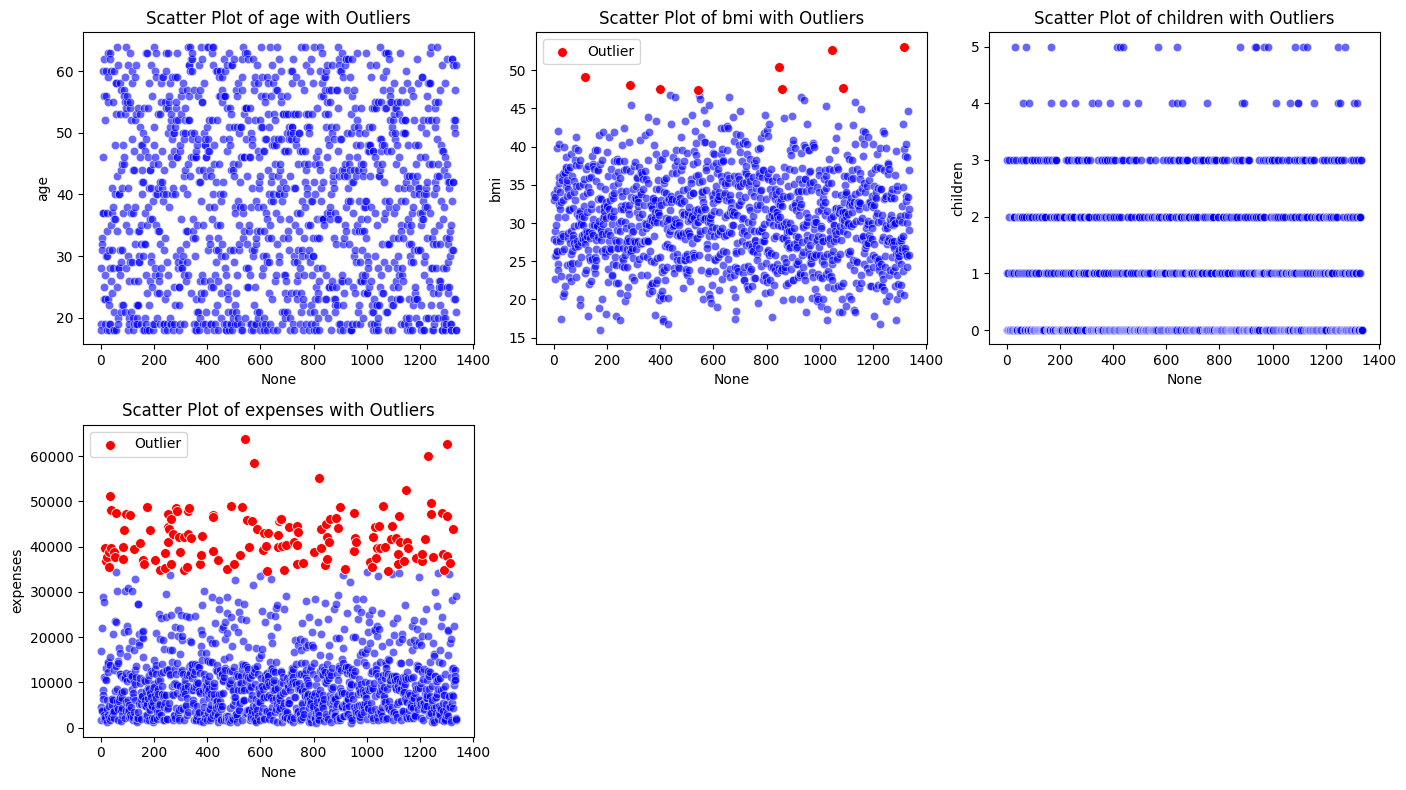

In [13]:
# Visualizing Outliers with Scatter Plots
plt.figure(figsize=(14, 8))  # Set up the plot size

for i, column in enumerate(numerical_columns, 1):

    plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
    sns.scatterplot(x=insurance_clients_df.index, y=insurance_clients_df[column], color='blue', alpha=0.6)  # Plot the data points

    # Highlight outliers in red with larger markers
    sns.scatterplot(x=outliers_dict[column].index, y=outliers_dict[column], color='red', marker='o', s=50, label='Outlier')
    plt.title(f'Scatter Plot of {column} with Outliers')  # Set the title for each subplot


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the scatter plots with highlighted outliers


## 3.5 Do a complete correlation analysis of the entire data

*Hint: Create dummy variables for all the categorical variables and then use a heatmap to do the correlation analysis.*

age                 0.299008
bmi                 0.198576
children            0.067998
expenses            1.000000
sex_female         -0.057292
sex_male            0.057292
smoker_no          -0.787251
smoker_yes          0.787251
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: expenses, dtype: float64


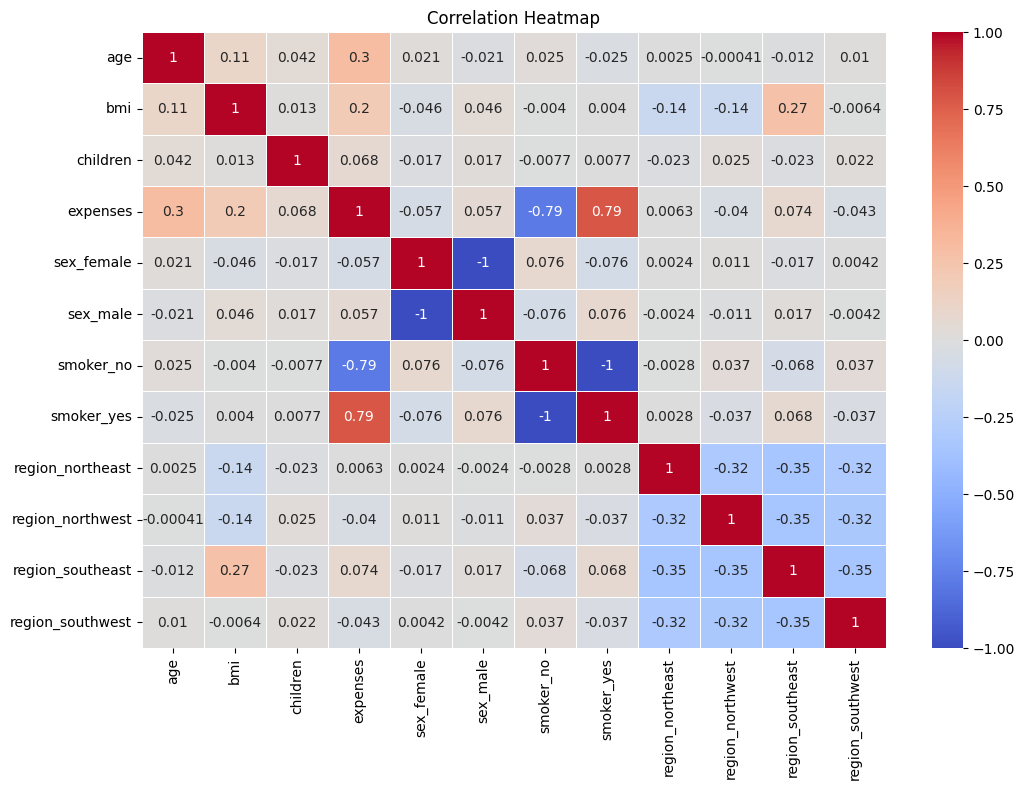

In [14]:
# Identify categorical and numerical columns
corr_categorical_columns = insurance_clients_df.select_dtypes(include='object').columns
corr_numerical_columns = insurance_clients_df.select_dtypes(include='number').columns

# Apply one-hot encoding directly to the entire dataset
insurrance_encoded_df = pd.get_dummies(insurance_clients_df, columns=corr_categorical_columns)

# Calculate the correlation matrix
corr_matrix = insurrance_encoded_df.corr()

# Print the correlation with the 'expenses' variable
print(corr_matrix['expenses'])

# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(insurrance_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

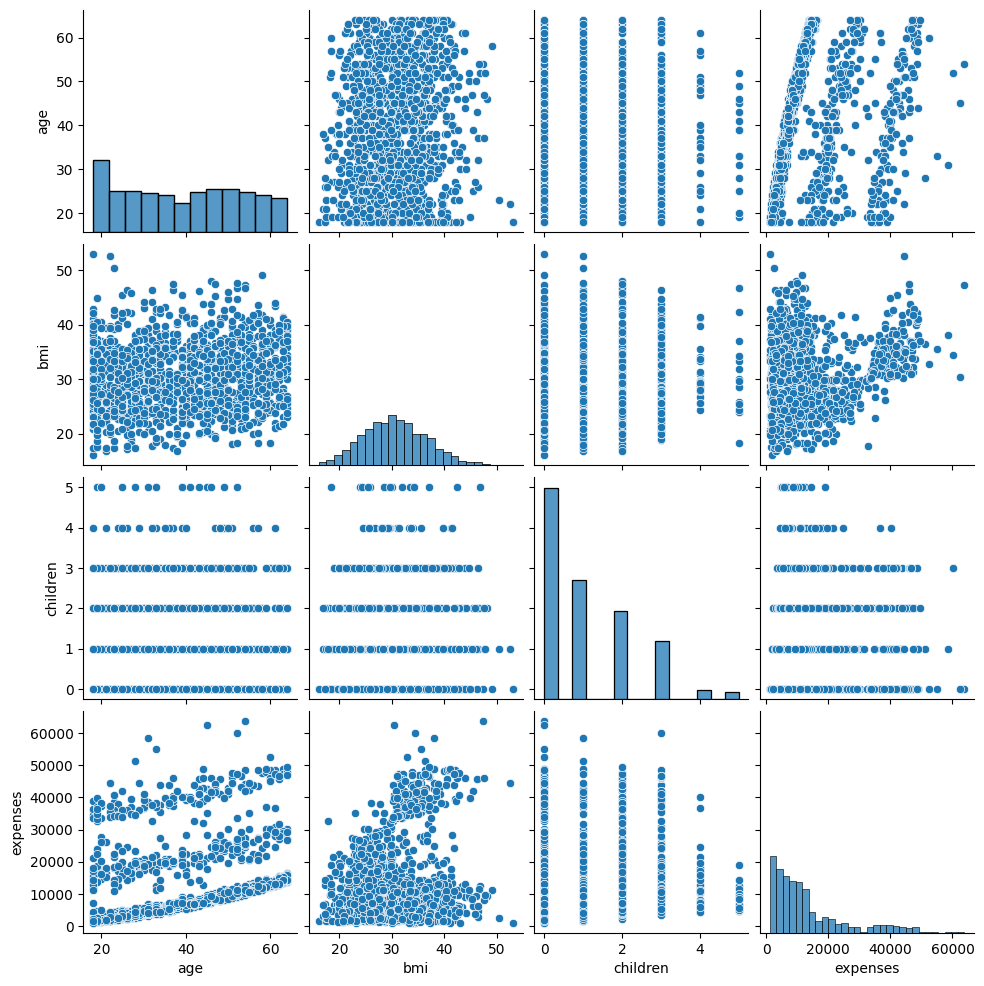

In [15]:
# Create a pair plot to inspect the relationships between the features

sns.pairplot(insurance_clients_df)
plt.show()

In [16]:
insurance_clients_df[['sex',	'smoker',	'region']]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [17]:
insurance_clients_df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


# STEP 4: Data Preprocessing

Data preprocessing is the crucial step of cleaning and transforming raw data into a suitable format for analysis or modeling, ensuring that the data is accurate, complete, and ready for machine learning algorithms. It helps improve model performance and accuracy by addressing issues like missing values, noise, and inconsistencies.

## 4.1 Check for any missing values & handle them if necessary

In [18]:
# Check the dataset info
insurance_clients_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [19]:
# I can also use the below to check for missing values.  although I generally like the look of the above methond.
# However the below method does provide more info...
insurance_clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# STEP 5: Model Building

## 5.1 Split the data into Training & Test data

*Hint: Use the dummy encoded data.*

In [20]:
### Separate the target & feature variables

# Select features and target variable for regression
features = insurrance_encoded_df[insurrance_encoded_df.columns.difference(['expenses'])].columns

# Split the data into features (X) and target (y)
X = insurrance_encoded_df[features]
y = insurrance_encoded_df['expenses']

# Check the feature data
X.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.9,0,False,False,False,True,True,False,False,True
1,18,33.8,1,False,False,True,False,False,True,True,False
2,28,33.0,3,False,False,True,False,False,True,True,False
3,33,22.7,0,False,True,False,False,False,True,True,False
4,32,28.9,0,False,True,False,False,False,True,True,False


In [21]:
### Split into training and testing sets

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
       age   bmi  children  region_northeast  region_northwest  \
560    46  20.0         2             False              True   
1285   47  24.3         0              True             False   
1142   52  24.9         0             False             False   
969    39  34.3         5             False             False   
486    54  21.5         3             False              True   

      region_southeast  region_southwest  sex_female  sex_male  smoker_no  \
560              False             False        True     False       True   
1285             False             False        True     False       True   
1142              True             False        True     False       True   
969               True             False        True     False       True   
486              False             False        True     False       True   

      smoker_yes  
560        False  
1285       False  
1142       False  
969        False  
486        False  
Training tar

In [22]:
X_train

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
560,46,20.0,2,False,True,False,False,True,False,True,False
1285,47,24.3,0,True,False,False,False,True,False,True,False
1142,52,24.9,0,False,False,True,False,True,False,True,False
969,39,34.3,5,False,False,True,False,True,False,True,False
486,54,21.5,3,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.4,4,True,False,False,False,True,False,True,False
1130,39,23.9,5,False,False,True,False,True,False,True,False
1294,58,25.2,0,True,False,False,False,False,True,True,False
860,37,47.6,2,False,False,False,True,True,False,False,True


## 5.2 Scale the dataset

In [23]:
### Scaling the data

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.47222651, -1.74857248,  0.73433626, ..., -1.0246016 ,
         0.50874702, -0.50874702],
       [ 0.54331294, -1.03670397, -0.91119211, ..., -1.0246016 ,
         0.50874702, -0.50874702],
       [ 0.8987451 , -0.93737348, -0.91119211, ..., -1.0246016 ,
         0.50874702, -0.50874702],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211, ...,  0.97598911,
         0.50874702, -0.50874702],
       [-0.16755139,  2.82063006,  0.73433626, ..., -1.0246016 ,
        -1.96561348,  1.96561348],
       [ 1.1120044 , -0.1096194 , -0.91119211, ...,  0.97598911,
         0.50874702, -0.50874702]])

## 5.3 Fit the Linear Regression Model

In [24]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
trained_lr_model = lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = trained_lr_model.predict(X_test)

y_pred


array([ 8976.76760964,  7061.47078348, 36861.00837958,  9439.16742899,
       26965.82783567, 10866.56613365,   163.68342867, 16902.1625389 ,
        1092.78891435, 11221.84972563, 28100.81510083,  9381.37647426,
        5265.11298425, 38433.51445836, 40248.06655201, 37084.37888675,
       15248.12984097, 35901.53286407,  9127.45708271, 31464.93323459,
        3848.37001706, 10130.91497172,  2370.69195712,  7139.66129952,
       11294.96254187, 12967.62453886, 14509.58195129,  6160.69986604,
        9962.85959031,  2163.07205222,  9116.85372521, 13064.63457975,
        4571.36274084,  3423.94442545,  4460.1164586 , 13031.12862237,
        1979.67910034,  8813.16035987, 33258.81811961, 32584.31750912,
        3910.32992482,  4343.38905053, 14143.48952085, 11435.21647816,
        8791.14158849, 12096.4844327 ,  5272.59144805,  3150.51559564,
       35504.10915377,  9154.13549953, 15835.69309292,  2352.62339682,
       12359.83078765,  1472.69854255, 13377.66583865, 12570.20082856,
      

## 5.4 Check the Coefficients


In [25]:
### Print the best fit regression line
print("The best fit line is:",lr_model.coef_[0],"X+",lr_model.intercept_)

The best fit line is: 3614.697632625316 X+ 13346.089869158879


## 5.5 Evaluate the model - Find MAE, MSE, R-squared

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4181.561524000791
Mean Squared Error (MSE): 33600065.35507783
R-squared (R2): 0.7835726930039905


In [27]:
# # Print overall model Summary

# """Why does this not work on my rtrained model???"""

# trained_lr_model.summary()




## 5.6 Calculate Adjusted R-squared value using the formula

Here's the Adjusted R-squared formula formatted for Google Colab markdown:

```
Adjusted R-squared (R²ᴀᴅᴊ) = 1 - [(1 - R²) * (n - 1)] / (n - k - 1)
```

### Where:
- **R²** is the R-squared value of the model.
- **n** is the total number of observations.
- **k** is the number of independent variables (predictors) in the model.



In [28]:
"""Why is my r2 the same, but my adjusted r2 different from the solution??"""

# Calculate the number of observations (n) and the number of predictors (p)
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate the Adjusted R-squared value
adj_r_sqrd = 1 - ((1-r2)*(n-1))/ (n-p-1)

# Print the Adjusted R-squared value
print(adj_r_sqrd)

0.7742730821565057


## 5.7 Visualize the predictions

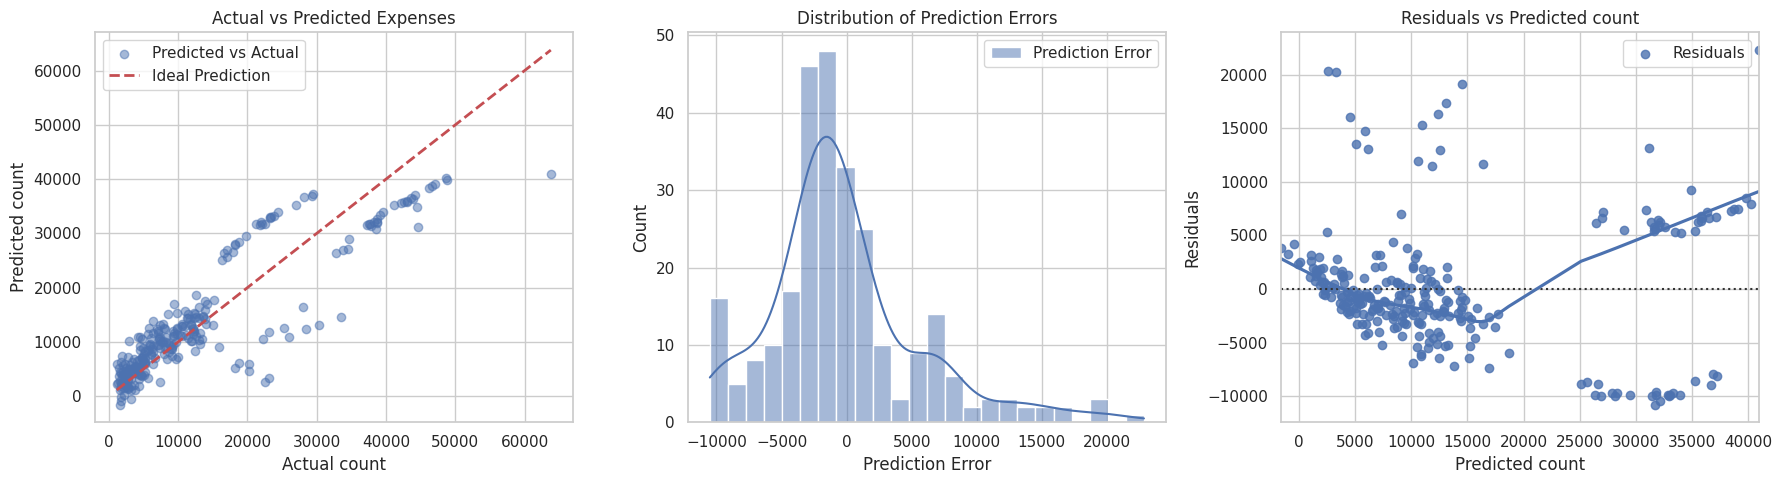

In [29]:
# Visualizing the predictions

# Create a scatter plot of actual vs. predicted expenses


# Add a line plot representing the ideal case where predicted values equal actual values

# Add titles and labels to the plot

# Display the plot


"""Does the plot of the residuals idicate that the model violates the correlation of errors assumption?"""


import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of actual vs predicted fares
axes[0].scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Prediction')
axes[0].set_xlabel('Actual count')
axes[0].set_ylabel('Predicted count')
axes[0].set_title('Actual vs Predicted Expenses')
axes[0].legend()

# Distribution plot of prediction errors
errors = y_test - y_pred
sns.histplot(errors, kde=True, ax=axes[1], label='Prediction Error')
axes[1].set_xlabel('Prediction Error')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()

# Residual plot
sns.residplot(x=y_pred, y=errors, lowess=True, ax=axes[2], label='Residuals')
axes[2].set_xlabel('Predicted count')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted count')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()
